# Regression Models

### Init

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### 1. About the dataset:
- Features: 12 chemical properties of red wine
- Target: to predict the quality of each wine, range from 3 -8 (>6.5: good quality)

In [2]:
# data loading

df = pd.read_csv('./winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
quality_counts = df['quality'].value_counts(normalize=True) * 100  
print(quality_counts)

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64


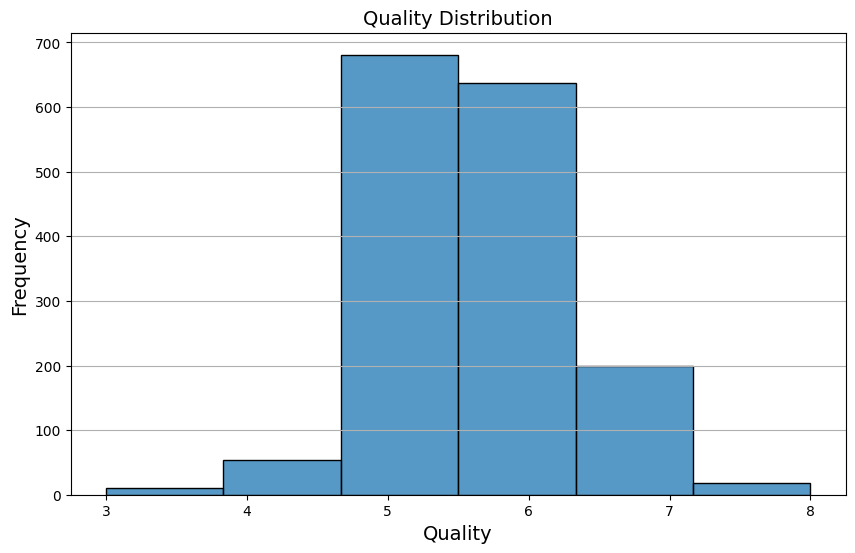

In [4]:
df['quality'].value_counts()

# data visualization

plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], bins=6, kde=False)
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(np.arange(3, 9, 1))
plt.grid(axis='y')
plt.show()

We can see that largest quality score was 8, and the least was 3. And the majority were rated at 5-6. 

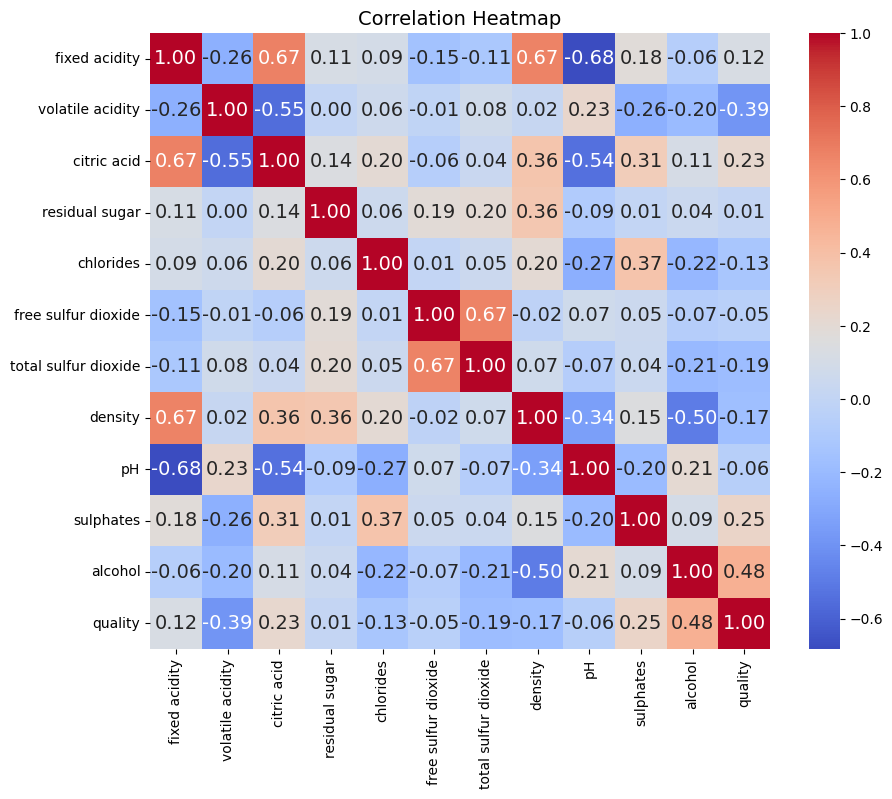

In [5]:
# data visualization

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Choose all 12 features

#### Split Dataset

Data is splitted into 3 parts: 60% for training, 20% for validation, 20% for testing
- We use the training data set for training the model.
- And use the validation data set for validate the model.
- We only use the testing data set when we found the best model.

In [6]:
# data classification

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## 2 Plain Linear Regression

In [7]:
# training
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(32.033919337829566,
 array([ 2.46399813e-02, -1.22503465e+00, -3.40497461e-01,  2.39090277e-02,
        -1.72273463e+00,  2.83923311e-03, -3.09239574e-03, -2.80998969e+01,
        -3.22429499e-01,  7.14378588e-01,  2.80982010e-01]))

In [8]:
y_pred = lin_reg.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_pred)
print("Valid MSE:", mse_valid)

Valid MSE: 0.39229584165974424


Plain LinearRegression solves the linear function directly:

$$ a_1x_1 + a_2x_2 + \dot + a_nx_n = y$$

## 3 SGD Model
### 3.1 SGD without learning rate

In [9]:
sgd_reg = SGDRegressor(random_state=42)
sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_valid)

mse_valid_sgd = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_sgd)

Valid MSE: 2.5761881613782735e+24


However, SGD picks only one training sample at each step to perform the gradient descent algorithm, \
which is fast, but is also difficult to find the best parameters.

#### 3.2 SGD with learning rate

In [10]:
sgd_regressor = SGDRegressor(eta0 = 0.0001, random_state=42)
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_valid)

mse_valid_sgd = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_sgd)

Valid MSE: 0.479268192033965


MSE is improved by setting the `eta0` to 0.0001, which which reduces the step size for better performance.

In [11]:
param_grid = [{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}]

sgd_regressor = SGDRegressor()
gridsearch = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [12]:
gridsearch.best_params_

{'eta0': 0.0001}

In [13]:
gridsearch.best_estimator_

SGDRegressor(eta0=0.0001)

In [14]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00421929, 0.00542784, 0.00403314, 0.00409379, 0.00281763,
        0.00391641]),
 'std_fit_time': array([0.00047395, 0.00115536, 0.00068582, 0.00307312, 0.00038122,
        0.00078517]),
 'mean_score_time': array([0.00077996, 0.00020003, 0.00079632, 0.00040426, 0.00058122,
        0.0004034 ]),
 'std_score_time': array([0.00039177, 0.00040007, 0.00039825, 0.00049514, 0.00047587,
        0.00049418]),
 'param_eta0': masked_array(data=[1.0, 0.1, 0.01, 0.001, 0.0001, 2.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'eta0': 1},
  {'eta0': 0.1},
  {'eta0': 0.01},
  {'eta0': 0.001},
  {'eta0': 0.0001},
  {'eta0': 2}],
 'split0_test_score': array([-1.05908278e+28, -4.28551037e+26, -1.06132517e+24, -4.57471412e-01,
        -4.20822203e-01, -1.27708421e+29]),
 'split1_test_score': array([-7.65106314e+27, -1.87897086e+26, -7.95375347e+23, -5.32986289e-01,
        -5.96721518e-01, -1.62482766e+29]),
 'split2_tes

In [15]:
gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')>

In [16]:
gridsearch.best_score_

-0.5186826576410335

GridsearchCV helps to find out the optimized  hyperparameter `eta0`, \
it indicates for this dataset, the smallest step 0.001 produces the best performance.

In [17]:
# function to draw a learning curve
def plot_learning_curve(model, title, upper_limit):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train, y_train,
        train_sizes=np.linspace(0.01, 1.0, 40),
        cv=5,
        scoring="neg_root_mean_squared_error"
    )

    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes/X_train.shape[0]*100, train_errors, "r-+", linewidth=2, label="Train RMSE")
    plt.plot(train_sizes/X_train.shape[0]*100, valid_errors, "b-", linewidth=2, label="Validation RMSE")
    plt.title(f"Learning Curve ({title})")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, upper_limit])
    plt.show()

### 3.3 Draw learning curve for Linear Regression

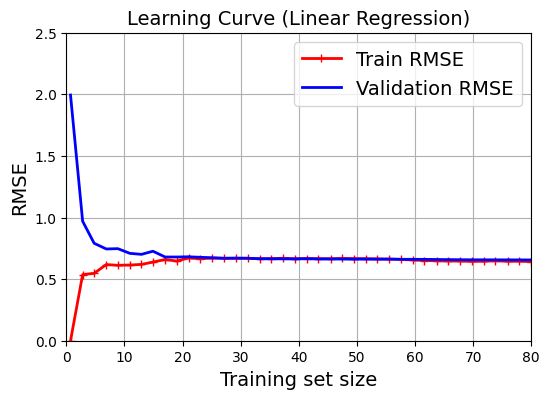

In [18]:
# draw learning curve
plot_learning_curve(LinearRegression(), "Linear Regression", 2.5)

## 4 Polynomial Models

In [19]:
# define polynomial regression model
def generate_polynomial_features(degree):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )

In [20]:
# train polynomial regression model: degree 2
polynomial_regression = generate_polynomial_features(degree=2)
polynomial_regression.fit(X_train, y_train)

y_pred = polynomial_regression.predict(X_valid)

mse_valid_poly = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_poly)


Valid MSE: 0.43016275945012483


In [21]:
# train polynomial regression model: degree 3
polynomial_regression = generate_polynomial_features(degree=3)
polynomial_regression.fit(X_train, y_train)

y_pred = polynomial_regression.predict(X_valid)

mse_valid_poly = mean_squared_error(y_valid, y_pred)

print("Valid MSE:", mse_valid_poly)


Valid MSE: 7.269763869068127


In [22]:
polynomial_regression.named_steps['linearregression'].intercept_, polynomial_regression.named_steps['linearregression'].coef_

(5.636079408197856,
 array([-1.80816795e+05, -2.04451384e+04,  4.81024133e+04, -1.32036493e+05,
        -1.99323606e+05,  1.22177616e+05, -9.34194831e+04,  2.99296579e+05,
        -8.23100392e+04, -6.80668091e+04,  1.50922673e+05, -1.41867965e+03,
        -1.25189802e+03, -6.90699558e+02, -2.18949054e+03, -2.46805903e+03,
         1.14065058e+03, -8.53613755e+02,  3.67782285e+05, -4.23683665e+03,
         1.20902434e+03,  4.28136911e+03, -1.78098030e+02,  6.27050103e+01,
         1.20117902e+02, -7.43858314e+02, -6.35194138e+02,  9.30699413e+02,
         4.27951137e+04,  1.23272768e+03, -5.40776244e+02, -9.07710221e+02,
         6.32059715e+02,  1.10487424e+03, -8.74370001e+02, -2.37488066e+02,
         3.53038263e+02, -9.57709336e+04,  2.03445192e+03, -5.69082929e+02,
        -2.54971351e+03, -1.36364095e+03,  1.68881673e+02,  2.11210342e+03,
        -1.74533524e+03,  2.66639684e+05,  6.90075014e+02, -1.94189663e+03,
         9.06671885e+02, -3.44186267e+02,  4.04758578e+02, -1.053825

In [23]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scale', StandardScaler()),
    ('reg', LinearRegression())
])

param_grid = {
    'poly__degree': [2, 3, 4, 5]
}

gridsearch = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scale', StandardScaler()),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4, 5]},
             scoring='neg_root_mean_squared_error')

In [24]:
gridsearch.best_params_

{'poly__degree': 2}

In [25]:
# Calculate MSE for degrees 3, 4, and 5
for degree in [2,3, 4, 5]:
    polynomial_regression = generate_polynomial_features(degree=degree)
    polynomial_regression.fit(X_train, y_train)
    y_pred = polynomial_regression.predict(X_valid)
    mse_valid_poly = mean_squared_error(y_valid, y_pred)
    print(f"Valid MSE for degree {degree}: {mse_valid_poly}")

Valid MSE for degree 2: 0.43016275945012483
Valid MSE for degree 3: 7.269763869068127
Valid MSE for degree 4: 18212.490422660652
Valid MSE for degree 5: 6365.629215499049


GridSearchCV is also used for finding the best hyperparameter for Polynomial Regression.
Degree 2 outputs the best performance.

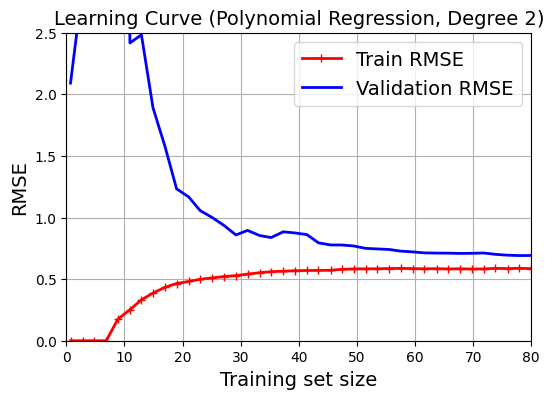

In [26]:
# draw learning curve
polynomial_regression = generate_polynomial_features(degree=2)
plot_learning_curve(polynomial_regression, "Polynomial Regression, Degree 2", 2.5)

The model is ofverfitting since \
the training line is low (fit the the training data well) but the blue line is much higher\
the blue line starts high and fluctuates \



## 5 Lasso Regularization

In [27]:
def generate_lasso_model(alpha):
    return make_pipeline(
        PolynomialFeatures(degree=2, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha, max_iter=10000, random_state=42)
    )


In [28]:
# train lasso regression model
lasso_model = generate_lasso_model(alpha=0.01)

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_valid)
mse_valid_lasso = mean_squared_error(y_valid, y_pred)
print("Valid MSE:", mse_valid_lasso)

Valid MSE: 0.3779350517072124


In [29]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', StandardScaler()),
    ('lasso', Lasso(max_iter=100000, tol=0.01, random_state=42))
])

param_grid = {
    'lasso__alpha': [2, 1.5, 1, 0.1, 0.01, 0.001, 0.0001]
}

gridsearch = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'lasso__alpha': 0.01}

The GridsearchCV helps us to get the best hyperparameter alpha.

In [30]:
lasso_model.named_steps['lasso'].intercept_, lasso_model.named_steps['lasso'].coef_

(5.636079249217942,
 array([ 0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        , -0.00599605, -0.        ,  0.        ,
         0.20648816, -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.09926971, -0.01382668, -0.        ,
        -0.05235629,  0.        ,  0.0550844 , -0.        , -0.07787934,
        -0.        , -0.        ,  0.        , -0.        , -0.03575517,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.04277414,  0.00984035,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.02891092, -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.02046961,  0.        ,  0.        ,  0.        ,
        -0.1957019 ,  0.       

It's clear to see the weight of some features were set to 0, which may helped to reduce the overfitting.

c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.777e-03, tolerance: 2.067e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.777e-03, tolerance: 2.067e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\phuon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

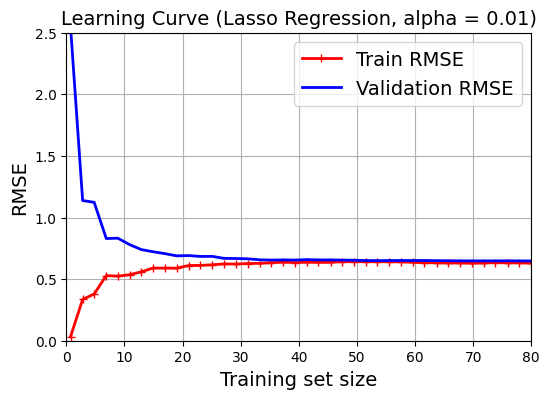

In [31]:
plot_learning_curve(lasso_model, "Lasso Regression, alpha = 0.01", 2.5)

The Lasso model help reduces the overfitting in Polinomial Regression, \
and the result is slightly better than plain Linear Regression, \
because the validation RMSE is slightly lower and the curve is also more stable.

## 6 Apply the best model on test set

We test the model on the test set with the best model: Lasso regression with alpha = 0.01

In [32]:
y_test_pred = lasso_model.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test_lasso)

Test MSE: 0.4478210163276257


### 7. Conclusion for this dataset
- The best model for this dataset is Lasso, as it has a low MSE (0.377) and the learning curve shows no underfitting or overfitting.

- In comparison, the Plain Linear Regression model gives a validation MSE of 0.3922, and its learning curve is also good,with no signs of underfitting or overfitting.

- From these results, we observe that when using Linear Regression, all 12 features are included. Even though some features may be weak, they do not significantly harm the model’s performance, SME is good.

- When using Lasso, it removes some weak features by setting their coefficients to 0, and its MSE is slightly better than that of Linear Regression.